# Plot S4 vs time in function of: frequency and constelation v3.0
### It includes elevation info, data is filtered for elev>35º, and then it is filtered again for s4>0.3
### Corrections given by Cesar Valladares is also done
Target:
![plot_s4_v2](plot_s4_v2.png)

In [42]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

## 1) Import scintilacion files (.s4)  

In [43]:
directorio = "/home/luis/Desktop/Proyects_Files/LISN/GPSs/Tareas/Graficas_cintilaciones/Input_data/Data_procesada/"
file_name = "ljic_200928.s4"
df1 = pd.read_csv(directorio + file_name, header=None, sep="\t")
df1.head(3)

/home/luis/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,8,13,14,15,16,31,32,33,34,37,38,39,40,41,42,43,44,45,46,55,56,61,62,63,79,80,85,86,103,104,105,106,109,110,111,112,113,114,115,116,117,118,129,130,136,138,139,140,153,154,161,162,163,164,165,166,175,176,181,182,183,184,199,200,205,206,223,224,225,226,229,230,231,232,233,234,235,236,237,238,249,250,256,257,258,259,260,261,262,273,274,279,280,281,282,283,284,285,286,378,391,392,395,396,397,398,399,400,401,404,405,406,407,408,409,410,411,415,416,421,422,463,464,469,470,471,472,473,487,488,493,494,495,496,511,512,517,518,519,520,521,535,536,541,542,543,544,545,559,560,565,566,567,568,569,592,593,607,608,613,614,615,616,617,631,632,637,638,663,664,665,683,684,687,688,689,695,696,697,698,699,707,708,712,713,719,720,721,722,723,731,732,743,744,745,746,755,756,760,761,767,768,769,770,771,775,776,781,782,783,784,795,799,800,805,806,807,808,809,817,818,819,831,832,833,841,842,843,844,

,0,1,2,3,4,5,6,7,8,9,...,906,907,908,909,910,911,912,913,914,915
0,20,272,60,34,G10,112.0,71.0,0.022,0.024,0.037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,272,120,34,G10,113.0,70.0,0.023,0.024,0.048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,272,180,34,G10,115.0,70.0,0.024,0.025,0.043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Columns: 916 entries, 0 to 915
dtypes: float64(183), int64(4), object(729)
memory usage: 8.8+ MB


## 2. Process the dataframe

In [45]:
# Eliminacion de ciertas columnas
for i in df1.columns:
    if i>3:
        m = (i-4)%24
        #if m == 1: del df1[i] # delete azimuth
        #elif m == 2: del df1[i] # delete elevation
        if m >= 9: del df1[i]

df1.head()

,0,1,2,3,4,5,6,7,8,9,...,876,892,893,894,895,896,897,898,899,900
0,20,272,60,34,G10,112.0,71.0,0.022,0.024,0.037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,272,120,34,G10,113.0,70.0,0.023,0.024,0.048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,272,180,34,G10,115.0,70.0,0.024,0.025,0.043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,272,240,34,G10,116.0,70.0,0.043,0.025,0.038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,272,300,34,G10,117.0,70.0,0.033,0.025,0.041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Columns: 346 entries, 0 to 900
dtypes: float64(118), int64(4), object(224)
memory usage: 3.3+ MB


In [47]:
df1.columns = np.arange(len(df1.columns)) # Rename the columns 
df1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,336,337,338,339,340,341,342,343,344,345
0,20,272,60,34,G10,112.0,71.0,0.022,0.024,0.037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,272,120,34,G10,113.0,70.0,0.023,0.024,0.048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Creacion de un nuevo dataframe
df2 = pd.DataFrame(columns=range(12))

# Se llenan el resto de valores
T = 9 # Period of dataset
for i in range(len(df1)):
    for h in range(df1.iloc[i,3]): # that cell contains the number of measurements 
        m = df1.iloc[i,[0, 1, 2, 4+T*h, 5+T*h, 6+T*h, 7+T*h, 8+T*h, 9+T*h, 10+T*h, 11+T*h, 12+T*h]]
        m.index = range(len(m))
        df2 = df2.append(m)

df2.index = range(len(df2))
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,20,272,60,G10,112.0,71.0,0.022,0.024,0.037,0.038,0.026,0.023
1,20,272,60,G16,216.0,53.0,0.082,0.036,nan,nan,nan,nan
2,20,272,60,G20,140.0,37.0,0.111,0.055,nan,nan,nan,nan
3,20,272,60,G21,254.0,33.0,0.09,0.057,nan,nan,nan,nan
4,20,272,60,G26,334.0,80.0,0.025,0.029,0.035,0.036,0.021,0.021


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40719 entries, 0 to 40718
Data columns (total 12 columns):
0     40719 non-null object
1     40719 non-null object
2     40719 non-null object
3     40719 non-null object
4     40717 non-null float64
5     40717 non-null float64
6     40719 non-null object
7     40719 non-null object
8     40719 non-null object
9     40719 non-null object
10    40719 non-null object
11    40719 non-null object
dtypes: float64(2), object(10)
memory usage: 3.7+ MB


In [50]:
# Change type object to double 
for i in range(3):
    df2[i] = df2[i].astype("int")

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40719 entries, 0 to 40718
Data columns (total 12 columns):
0     40719 non-null int64
1     40719 non-null int64
2     40719 non-null int64
3     40719 non-null object
4     40717 non-null float64
5     40717 non-null float64
6     40719 non-null object
7     40719 non-null object
8     40719 non-null object
9     40719 non-null object
10    40719 non-null object
11    40719 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 3.7+ MB


In [52]:
# Change data type to str and then to float
for i in range(6):
    df2[6+i] = df2[6+i].astype("str").str.strip().astype("float")
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,20,272,60,G10,112.0,71.0,0.022,0.024,0.037,0.038,0.026,0.023
1,20,272,60,G16,216.0,53.0,0.082,0.036,NaN,NaN,NaN,NaN
2,20,272,60,G20,140.0,37.0,0.111,0.055,NaN,NaN,NaN,NaN
3,20,272,60,G21,254.0,33.0,0.090,0.057,NaN,NaN,NaN,NaN
4,20,272,60,G26,334.0,80.0,0.025,0.029,0.035,0.036,0.021,0.021


In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40719 entries, 0 to 40718
Data columns (total 12 columns):
0     40719 non-null int64
1     40719 non-null int64
2     40719 non-null int64
3     40719 non-null object
4     40717 non-null float64
5     40717 non-null float64
6     40620 non-null float64
7     40620 non-null float64
8     27946 non-null float64
9     27946 non-null float64
10    21716 non-null float64
11    21716 non-null float64
dtypes: float64(8), int64(3), object(1)
memory usage: 3.7+ MB


In [54]:
# Rename columns 
df2.columns = ["YY", "DOY", "SOD", "PRN", "Azimuth", "Elevation", "S4_sig1", "S4_sig1_corr", "S4_sig2", "S4_sig2_corr", "S4_sig3", "S4_sig3_corr"]
df2.head()

,YY,DOY,SOD,PRN,Azimuth,Elevation,S4_sig1,S4_sig1_corr,S4_sig2,S4_sig2_corr,S4_sig3,S4_sig3_corr
0,20,272,60,G10,112.0,71.0,0.022,0.024,0.037,0.038,0.026,0.023
1,20,272,60,G16,216.0,53.0,0.082,0.036,NaN,NaN,NaN,NaN
2,20,272,60,G20,140.0,37.0,0.111,0.055,NaN,NaN,NaN,NaN
3,20,272,60,G21,254.0,33.0,0.090,0.057,NaN,NaN,NaN,NaN
4,20,272,60,G26,334.0,80.0,0.025,0.029,0.035,0.036,0.021,0.021


In [55]:
# Calculate the corrected S4
def get_correctedS4(row):
    s4 = row[0]
    correction= row[1]
    
    # Treat nan numbers 
    if pd.isnull(s4) or pd.isnull(correction):
        return np.nan
    else:
        # Calculate the corrected S4
        x = s4**2-correction**2
        if x>0:
            return x**0.5
        else:
            return 0    

for i in range(3):        
    df2[f"S4_sig{i+1}"] = df2[[f"S4_sig{i+1}",f"S4_sig{i+1}_corr"]].apply(get_correctedS4, axis=1)
df2.head()

,YY,DOY,SOD,PRN,Azimuth,Elevation,S4_sig1,S4_sig1_corr,S4_sig2,S4_sig2_corr,S4_sig3,S4_sig3_corr
0,20,272,60,G10,112.0,71.0,0.000000,0.024,0.0,0.038,0.012124,0.023
1,20,272,60,G16,216.0,53.0,0.073675,0.036,NaN,NaN,NaN,NaN
2,20,272,60,G20,140.0,37.0,0.096416,0.055,NaN,NaN,NaN,NaN
3,20,272,60,G21,254.0,33.0,0.069649,0.057,NaN,NaN,NaN,NaN
4,20,272,60,G26,334.0,80.0,0.000000,0.029,0.0,0.036,0.000000,0.021


In [56]:
# Delete some columns
del df2["S4_sig1_corr"]
del df2["S4_sig2_corr"]
del df2["S4_sig3_corr"]
df2.head()

,YY,DOY,SOD,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3
0,20,272,60,G10,112.0,71.0,0.000000,0.0,0.012124
1,20,272,60,G16,216.0,53.0,0.073675,NaN,NaN
2,20,272,60,G20,140.0,37.0,0.096416,NaN,NaN
3,20,272,60,G21,254.0,33.0,0.069649,NaN,NaN
4,20,272,60,G26,334.0,80.0,0.000000,0.0,0.000000


In [57]:
# Sort values by "PRN" and "SOD" 
df2 = df2.sort_values(["PRN","SOD"])

# Reindex in ascendent order 
df2.index = range(len(df2))

df2

,YY,DOY,SOD,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3
0,20,272,60240,C11,336.0,10.0,0.118440,0.264664,0.223385
1,20,272,60300,C11,336.0,10.0,0.113331,0.092671,0.141873
2,20,272,60360,C11,336.0,11.0,0.079768,0.088346,0.128386
3,20,272,60420,C11,336.0,11.0,0.079240,0.065115,0.089303
4,20,272,60480,C11,336.0,11.0,0.084847,0.074940,0.115100
5,20,272,60540,C11,336.0,12.0,0.096437,0.067971,0.094106
6,20,272,60600,C11,336.0,12.0,0.058172,0.049477,0.063317
7,20,272,60660,C11,336.0,13.0,0.032985,0.053245,0.042743
8,20,272,60720,C11,336.0,13.0,0.073973,0.061180,0.043162
9,20,272,60780,C11,336.0,13.0,0.023749,0.065230,0.051371


In [58]:
# Convert to datetime data type 
def change2datetime(row):
    yy = int(row[0])
    doy = int(row[1])
    sod = int(row[2])
    
    if sod < 0: 
        doy = doy -1
        sod = 60*60*24+sod      
    
    cdate = str(yy)+"-"+str(doy)+"-"+str(datetime.timedelta(seconds=sod))
    fecha = datetime.datetime.strptime(cdate, "%y-%j-%X")
    
    return fecha  

# Convert and assign
m = df2.apply(change2datetime, axis=1)

# Create the new column
df2.insert(0,column="DateTime",value=0)
df2["DateTime"] = m

# Delete some columns 
del df2["YY"]
del df2["DOY"]
del df2["SOD"]

df2

,DateTime,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3
0,2020-09-28 16:44:00,C11,336.0,10.0,0.118440,0.264664,0.223385
1,2020-09-28 16:45:00,C11,336.0,10.0,0.113331,0.092671,0.141873
2,2020-09-28 16:46:00,C11,336.0,11.0,0.079768,0.088346,0.128386
3,2020-09-28 16:47:00,C11,336.0,11.0,0.079240,0.065115,0.089303
4,2020-09-28 16:48:00,C11,336.0,11.0,0.084847,0.074940,0.115100
5,2020-09-28 16:49:00,C11,336.0,12.0,0.096437,0.067971,0.094106
6,2020-09-28 16:50:00,C11,336.0,12.0,0.058172,0.049477,0.063317
7,2020-09-28 16:51:00,C11,336.0,13.0,0.032985,0.053245,0.042743
8,2020-09-28 16:52:00,C11,336.0,13.0,0.073973,0.061180,0.043162
9,2020-09-28 16:53:00,C11,336.0,13.0,0.023749,0.065230,0.051371


In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40719 entries, 0 to 40718
Data columns (total 7 columns):
DateTime     40719 non-null datetime64[ns]
PRN          40719 non-null object
Azimuth      40717 non-null float64
Elevation    40717 non-null float64
S4_sig1      40620 non-null float64
S4_sig2      27946 non-null float64
S4_sig3      21716 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.2+ MB


In [60]:
df2.set_index("DateTime", inplace=True)
df2.head()

,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3
DateTime,,,,,,
2020-09-28 16:44:00,C11,336.0,10.0,0.118440,0.264664,0.223385
2020-09-28 16:45:00,C11,336.0,10.0,0.113331,0.092671,0.141873
2020-09-28 16:46:00,C11,336.0,11.0,0.079768,0.088346,0.128386
2020-09-28 16:47:00,C11,336.0,11.0,0.079240,0.065115,0.089303
2020-09-28 16:48:00,C11,336.0,11.0,0.084847,0.074940,0.115100


In [61]:
df2_copy = df2.copy()

### Filtering S4 data based on the angle and the S4 value

In [62]:
def filter_elev_s4(row):
    elev = row[0]
    s4 = row[1]
    threshold_s4 = 0.3
    threshold_elev = 35 # Unit: º
    
    if elev < threshold_elev:
        return [s4, np.nan, np.nan]
    elif s4 < threshold_s4:
        return [np.nan, s4, np.nan]
    else:
        return [np.nan, np.nan, s4]

In [63]:
#df2_aux = df2.copy()

for j in range(3):
    j += 1
    df_aux = df2[["Elevation", f"S4_sig{j}"]].apply(filter_elev_s4, axis=1, result_type="expand")
    df_aux.rename(columns={0:f"S4_sig{j}_1", 1:f"S4_sig{j}_2", 2:f"S4_sig{j}_3"}, inplace=True)
    df2 = pd.concat([df2, df_aux], join='inner', axis=1)
    #del df2_aux[f"S4_sig{j}"]

In [64]:
print(len(df2))
df2.head()

40719


,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3,S4_sig1_1,S4_sig1_2,S4_sig1_3,S4_sig2_1,S4_sig2_2,S4_sig2_3,S4_sig3_1,S4_sig3_2,S4_sig3_3
DateTime,,,,,,,,,,,,,,,
2020-09-28 16:44:00,C11,336.0,10.0,0.118440,0.264664,0.223385,0.118440,NaN,NaN,0.264664,NaN,NaN,0.223385,NaN,NaN
2020-09-28 16:45:00,C11,336.0,10.0,0.113331,0.092671,0.141873,0.113331,NaN,NaN,0.092671,NaN,NaN,0.141873,NaN,NaN
2020-09-28 16:46:00,C11,336.0,11.0,0.079768,0.088346,0.128386,0.079768,NaN,NaN,0.088346,NaN,NaN,0.128386,NaN,NaN
2020-09-28 16:47:00,C11,336.0,11.0,0.079240,0.065115,0.089303,0.079240,NaN,NaN,0.065115,NaN,NaN,0.089303,NaN,NaN
2020-09-28 16:48:00,C11,336.0,11.0,0.084847,0.074940,0.115100,0.084847,NaN,NaN,0.074940,NaN,NaN,0.115100,NaN,NaN


In [92]:
df2.head()

,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3,S4_sig1_1,S4_sig1_2,S4_sig1_3,S4_sig2_1,S4_sig2_2,S4_sig2_3,S4_sig3_1,S4_sig3_2,S4_sig3_3
DateTime,,,,,,,,,,,,,,,
2020-09-28 16:44:00,C11,336.0,10.0,0.118440,0.264664,0.223385,0.118440,NaN,NaN,0.264664,NaN,NaN,0.223385,NaN,NaN
2020-09-28 16:45:00,C11,336.0,10.0,0.113331,0.092671,0.141873,0.113331,NaN,NaN,0.092671,NaN,NaN,0.141873,NaN,NaN
2020-09-28 16:46:00,C11,336.0,11.0,0.079768,0.088346,0.128386,0.079768,NaN,NaN,0.088346,NaN,NaN,0.128386,NaN,NaN
2020-09-28 16:47:00,C11,336.0,11.0,0.079240,0.065115,0.089303,0.079240,NaN,NaN,0.065115,NaN,NaN,0.089303,NaN,NaN
2020-09-28 16:48:00,C11,336.0,11.0,0.084847,0.074940,0.115100,0.084847,NaN,NaN,0.074940,NaN,NaN,0.115100,NaN,NaN


In [97]:
# TEST

In [102]:
df_aux = df2[df2["PRN"]=="G2"]
df_aux.head()

,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3,S4_sig1_1,S4_sig1_2,S4_sig1_3,S4_sig2_1,S4_sig2_2,S4_sig2_3,S4_sig3_1,S4_sig3_2,S4_sig3_3
DateTime,,,,,,,,,,,,,,,
2020-09-28 08:55:00,G2,224.0,13.0,0.096566,NaN,NaN,0.096566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-28 08:56:00,G2,224.0,14.0,0.259779,NaN,NaN,0.259779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-28 08:57:00,G2,224.0,14.0,0.105000,NaN,NaN,0.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-28 08:58:00,G2,224.0,14.0,0.034799,NaN,NaN,0.034799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-28 08:59:00,G2,225.0,15.0,0.182975,NaN,NaN,0.182975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df_aux.index

DatetimeIndex(['2020-09-28 08:55:00', '2020-09-28 08:56:00',
               '2020-09-28 08:57:00', '2020-09-28 08:58:00',
               '2020-09-28 08:59:00', '2020-09-28 09:00:00',
               '2020-09-28 09:01:00', '2020-09-28 09:02:00',
               '2020-09-28 09:03:00', '2020-09-28 09:04:00',
               ...
               '2020-09-28 19:04:00', '2020-09-28 19:05:00',
               '2020-09-28 19:06:00', '2020-09-28 19:07:00',
               '2020-09-28 19:08:00', '2020-09-28 19:09:00',
               '2020-09-28 19:10:00', '2020-09-28 19:11:00',
               '2020-09-28 19:12:00', '2020-09-28 19:13:00'],
              dtype='datetime64[ns]', name='DateTime', length=572, freq=None)

In [104]:
df_aux2 = df_aux.asfreq("T")
df_aux2.head()

,PRN,Azimuth,Elevation,S4_sig1,S4_sig2,S4_sig3,S4_sig1_1,S4_sig1_2,S4_sig1_3,S4_sig2_1,S4_sig2_2,S4_sig2_3,S4_sig3_1,S4_sig3_2,S4_sig3_3
DateTime,,,,,,,,,,,,,,,
2020-09-28 08:55:00,G2,224.0,13.0,0.096566,NaN,NaN,0.096566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-28 08:56:00,G2,224.0,14.0,0.259779,NaN,NaN,0.259779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-28 08:57:00,G2,224.0,14.0,0.105000,NaN,NaN,0.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-28 08:58:00,G2,224.0,14.0,0.034799,NaN,NaN,0.034799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-28 08:59:00,G2,225.0,15.0,0.182975,NaN,NaN,0.182975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df_aux2.index

DatetimeIndex(['2020-09-28 08:55:00', '2020-09-28 08:56:00',
               '2020-09-28 08:57:00', '2020-09-28 08:58:00',
               '2020-09-28 08:59:00', '2020-09-28 09:00:00',
               '2020-09-28 09:01:00', '2020-09-28 09:02:00',
               '2020-09-28 09:03:00', '2020-09-28 09:04:00',
               ...
               '2020-09-28 19:04:00', '2020-09-28 19:05:00',
               '2020-09-28 19:06:00', '2020-09-28 19:07:00',
               '2020-09-28 19:08:00', '2020-09-28 19:09:00',
               '2020-09-28 19:10:00', '2020-09-28 19:11:00',
               '2020-09-28 19:12:00', '2020-09-28 19:13:00'],
              dtype='datetime64[ns]', name='DateTime', length=619, freq='T')

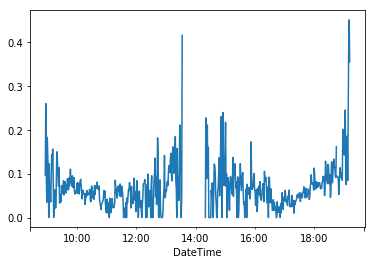

In [107]:
df_aux2["S4_sig1"].plot()

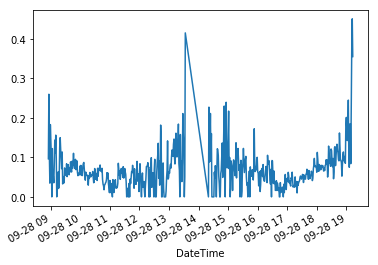

In [108]:
df_aux["S4_sig1"].plot()

In [65]:
#df2.to_csv("rawData2.csv")

Congratulations! The dataframe is ready to plot (y)

## 3. Plot 

### Extract data

#### a) Functions

a.1) Extract the available constellations 

In [66]:
# Identify the available constellations 
def extract_const():
    const = df2["PRN"].str[0].unique() # extract the first character of each cell 
    return const

# Test
extract_const()

array(['C', 'E', 'G', 'R', 'S'], dtype=object)

a.2) Extract the available PRNs of a constellation

In [67]:
# Extract PRNs of a constellation and freq which there is no null data    
def extract_prns(const, freq): # const: char (e.g. 'G')
    prns = df2["PRN"].unique().tolist()
    PRNs = [value for value in prns if const in value]
    PRNs.sort(key=lambda x: int(x[1:])) # sort in ascendent order 
    
    # Check no null columns in the prns
    prn_values = []
    for value in PRNs:
        mask = df2["PRN"] == value
        df_test = df2[mask]
        if df_test[freq].isna().sum() < len(df_test): # when the column is not null 
            prn_values.append(value)
    
    return prn_values

# Test 
freq_list = ['S4_sig1', 'S4_sig2', 'S4_sig3'] 
const = 'S'

extract_prns(const, freq_list[0])

['S25', 'S31', 'S33', 'S38']

#### b) Extract S4 data

In [68]:
def get_s4(prn, freq): # prn: str (e.g. 'C14') ; freq: str (e.g. 'S4_sig1')  
    mask = df2["PRN"] == prn
    df_aux = df2[mask]
    #df_final = df_aux[freq]
    df_final_1 = df_aux[freq + "_1"]
    df_final_2 = df_aux[freq + "_2"]
    df_final_3 = df_aux[freq + "_3"]
    
    return {1: df_final_1, 2: df_final_2, 3: df_final_3} 

# Test

s4_data = get_s4("C14", freq_list[0])
s4_data[1].head()

DateTime
2020-09-28 14:29:00    0.095708
2020-09-28 14:30:00    0.159490
2020-09-28 14:31:00    0.179956
2020-09-28 14:32:00    0.042143
2020-09-28 14:33:00    0.019799
Name: S4_sig1_1, dtype: float64

#### c) Extract elevation info

In [69]:
def get_elevation(prn, freq):
    mask = df2["PRN"] == prn
    df_aux = df2[mask]
    df_final = df_aux["Elevation"]
    
    return df_final

# Test
df_test = get_elevation('G13', freq_list[2])
df_test.head()
    

DateTime
2020-09-28 10:15:00    8.0
2020-09-28 10:16:00    8.0
2020-09-28 10:17:00    8.0
2020-09-28 10:18:00    8.0
2020-09-28 10:19:00    9.0
Name: Elevation, dtype: float64

### Plot

#### a) Functions

a.1) Date functions

In [70]:
# Get file date
file_name = "ljic_200926.s4"
fecha = file_name[5:-3]
fecha2 = datetime.datetime.strptime(fecha, "%y%m%d")
fecha3 = datetime.datetime.strftime(fecha2,"%Y/%m/%d")
fecha2 

datetime.datetime(2020, 9, 26, 0, 0)

In [71]:
fecha2_tomorrow = fecha2 + pd.DateOffset(days=1)
fecha2_tomorrow = fecha2_tomorrow.to_pydatetime()
fecha2_tomorrow

datetime.datetime(2020, 9, 27, 0, 0)

In [72]:
# Get UTC day range to add a vertical span
fecha_morning_first = fecha2 + pd.DateOffset(hours=11)
fecha_morning_first = fecha_morning_first.to_pydatetime()
fecha_morning_first

datetime.datetime(2020, 9, 26, 11, 0)

In [73]:
fecha_morning_last = fecha2 + pd.DateOffset(hours=23)
fecha_morning_last = fecha_morning_last.to_pydatetime()
fecha_morning_last

datetime.datetime(2020, 9, 26, 23, 0)

a.2) Other functions

In [74]:
def convert2SVID(prn):
    if prn[0] == "S":
        nn = int(prn[1:])
        if 20 <= nn <= 40:
            return str(nn + 100)
        elif 41 <= nn <= 58:
            return str(nn + 157)
    else:
        return prn

In [75]:
# Get the frequency name and value for a given PRN code and Freq code
def get_freq_name(const, freq_code):
    if freq_code == 1:
        if const == 'G':
            return {"name":'L1CA', "value":"1575.42"}
        elif const == 'R':
            return {"name":'L1CA', "value":"1602"} # change 
        elif const == 'S':
            return {"name":'L1CA', "value":"1575.42"}
        elif const == 'J':
            return {"name":'L1CA', "value":"1575.42"}
        elif const == 'E':
            return {"name":'L1BC', "value":"1575.42"}
        elif const == 'C':
            return {"name":'B1', "value":"1575.42"}
        elif const == 'I':
            return {"name":'B1', "value":"1176.45"}
        else: 
            return "Insert a right code!"
    elif freq_code == 2:
        if const == 'G':
            return {"name":'L2C', "value":"1227.60"}
        elif const == 'R':
            return {"name":'L2C', "value":"1246"} # change 
        elif const == 'J':
            return {"name":'L2C', "value":"1227.60"}
        elif const == 'E':
            return {"name":'E5a', "value":'1176.45'}
        elif const == 'C':
            return {"name":'B2', "value":'1176.45'}
        elif const == 'S':
            return {"name":'L5', "value":'1176.45'}
        else: 
            return "Insert a right code!"
    elif freq_code == 3:
        if const == 'G':
            return {"name":'L5', "value":'1176.45'}
        elif const == 'J':
            return {"name":'L5', "value":'1176.45'}
        elif const == 'E':
            return {"name":'E5b', "value":'1207.14'}
        elif const == 'C':
            return {"name":'B3', "value":'1268.52'}
        else: 
            return "Insert a right code!"
    else:
        return "Insert a right code!"

In [76]:
# Get the name for a given PRN code
def get_prn_name(const):
    if const == 'G': return 'GPS'
    elif const == 'R': return 'GLONASS'
    elif const == 'E': return 'GALILEO'
    elif const == 'S': return 'SBAS'
    elif const == 'C': return 'BEIDOU'
    elif const == 'J': return 'QZSS'
    elif const == 'I': return 'IRNSS'
    else:
        return 'Incorrect PRN code!'

#### b) Plot 

In [77]:
def convert_GPS2SBAS_frequency(freq):
    if freq == 'S4_sig1': return freq
    elif freq == 'S4_sig3': return 'S4_sig2'    

In [78]:
def append_sbas_prns(const, freq, PRNs):
    const_sbas = 'S'
    if const == 'G':
        while freq != 'S4_sig2':
            freq_sbas = convert_GPS2SBAS_frequency(freq)
            PRNs_SBAS = extract_prns(const_sbas, freq_sbas)
            PRNs += PRNs_SBAS
            break
        return PRNs
    elif const == 'E':
        while freq != 'S4_sig3':
            freq_sbas = freq
            PRNs_SBAS = extract_prns(const_sbas, freq_sbas)
            PRNs += PRNs_SBAS
            break
        return PRNs
    else:
        return PRNs  

In [79]:
def change_frequency(const, freq):
    if const == 'G':
        return convert_GPS2SBAS_frequency(freq)
    elif const == 'E':
        return freq
    else:
        return freq

In [80]:
def plot_s4(const, freq, sbas=False):
    # Get the PRNs
    PRNs = extract_prns(const, freq)
    
    # Include SBAS data if corresponds
    if sbas: PRNs = append_sbas_prns(const, freq, PRNs)
    
    # Create the figure with the subplots 
    n_rows = (len(PRNs)+1)//2
    n_cols = 2
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(7*n_cols,1*n_rows), sharex="col", sharey="row",
                    gridspec_kw={'hspace': 0, 'wspace': 0})   
    j = 0

    for ax in axs.T.reshape(-1): # Plot up to down, rather than left to right 
        # ax -> s4
        # ax2 -> elevation
        ax2 = ax.twinx()
        
        if j < len(PRNs):
            # Plot s4 info
            prn_value = PRNs[j]
            
            # -> Get the correct freq if sbas==True
            if sbas and prn_value[0]=='S': 
                freq_n = change_frequency(const, freq)
            else: freq_n = freq
                
            df3_s4 = get_s4(prn_value, freq_n)
            
            color1 = "blue" # This color is used in y axis labels, ticks and border  
            colors1 = ["lightsteelblue", "cornflowerblue", "navy"] # These colors are used for the plots

            for k in range(3):
                df4_s4 = df3_s4[k+1]

                ax.plot(df4_s4.index, df4_s4.values, '.', color=colors1[k], markersize=2)
                ax.set_facecolor(color="lightgrey")
                ax.axvspan(fecha_morning_first, fecha_morning_last, color="white") # strip morning/night
            
            # Plot elevation info
            df3_elev = get_elevation(PRNs[j], freq)
            
            color2 = "orange"
            ax2.plot(df3_elev.index, df3_elev.values, '.', color=color2, markersize=1)
            
            # Annotate the prn in the subplot
            x_location = fecha2 + pd.Timedelta(minutes=30)
            ax2.text(x_location, 35, convert2SVID(PRNs[j]), fontsize=15, weight='roman') # 0.375

        # Set axis limits 
        ax.set_xlim([fecha2, fecha2_tomorrow])
        ax.set_ylim([0,1])
        ax2.set_ylim([0,90])

        # Set ticks and tick labels 
        # Set y axis format, labels odds subplots only
        len_half_ax = len(axs.T.reshape(-1))/2

        if j >= len_half_ax: # change only for the 2nd column
            k=j-len_half_ax

            # Set y labels only to even subplots
            ax.yaxis.set_minor_locator(AutoMinorLocator(4))
            ax.set_yticks([0,1])
            ax2.yaxis.set_minor_locator(AutoMinorLocator(4))
            ax2.set_yticks([0,90])

            if k%2 == 0: 
                ax.set_yticklabels([0,1])
                ax2.set_yticklabels([0,90])
            else:    
                ax.set_yticklabels(['',''])
                ax2.set_yticklabels(['',''])

            # Set yellow color to the right y axis
            for axis in ['top','bottom','left']:
                ax.spines[axis].set_linewidth(2)
                ax2.spines[axis].set_linewidth(2)

            ax.spines['right'].set_color(color2)
            ax.spines['right'].set_linewidth(2)
            ax2.spines['right'].set_color(color2)
            ax2.spines['right'].set_linewidth(2)
            ax2.tick_params(axis='y', which='both', colors=color2)

        else: # apply some changes to the 1st column 
            # remove y tick labels for elevation 
            ax2.yaxis.set_minor_locator(AutoMinorLocator(4))
            ax2.set_yticks([0,90])
            ax2.set_yticklabels(['',''])

            # set linewidth to top, bottom and right borders of the subplot
            for axis in ['top','bottom','right']:
                ax.spines[axis].set_linewidth(2)
                ax2.spines[axis].set_linewidth(2)

            # Set blue color to the left y axis
            ax.spines['left'].set_color(color1)
            ax.spines['left'].set_linewidth(2)
            ax2.spines['left'].set_color(color1)
            ax2.spines['left'].set_linewidth(2)
            ax.tick_params(axis='y', which='both', colors=color1)

        # set x axis format 
        hours = mdates.HourLocator(interval = 2)
        ax.xaxis.set_major_locator(hours) # ticks interval: 2h
        ax.xaxis.set_minor_locator(AutoMinorLocator(2)) # minor tick division: 2
        myFmt = DateFormatter("%H")
        ax.xaxis.set_major_formatter(myFmt) # x format: hours 
        
        # set the ticks style 
        ax.xaxis.set_tick_params(width=2, length=8, which='major', direction='out')
        ax.xaxis.set_tick_params(width=1, length=4, which='minor', direction='out')
        ax.yaxis.set_tick_params(width=2, length=15, which='major', direction='inout')
        ax.yaxis.set_tick_params(width=1, length=4, which='minor', direction='out')
        ax2.yaxis.set_tick_params(width=2, length=15, which='major', direction='inout')
        ax2.yaxis.set_tick_params(width=1, length=4, which='minor', direction='out')

        # set the label ticks 
        ax.tick_params(axis='x', which='major', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax2.tick_params(axis='y', labelsize=12)
        
        # set grid
        ax.grid(which='major', axis='both', ls=':', linewidth=1.2)
        ax.grid(which='minor', axis='both', ls=':', alpha=0.5)

        # Set title and axis labels 
        aux = get_freq_name(const, int(freq[-1]))
        frequency_name = aux["name"]
        frequency_value = aux["value"] + "MHz"
        
        # -> Title 
        if j == 0: # Subplot on Upper left  
            fig.text(0, 1, fecha3, ha='left', va='bottom', fontsize=17, weight='roman', transform=ax.transAxes)
            fig.text(0.5, 1, 'Jicamarca', ha='left', va='bottom', fontsize=17, weight='semibold', transform=ax.transAxes)   
                       
        if j == n_rows-1: # Subplot on Lower left 
            pass
        
        if j == n_rows: # Subplot on Upper right
            fig.text(0, 1, 'S4', ha='center', va='bottom', fontsize=17, weight='roman', transform=ax.transAxes)
            fig.text(0.5, 1, frequency_value, ha='center', va='bottom', fontsize=17, weight='roman', transform=ax.transAxes)
            fig.text(1, 1, f"{frequency_name} | {get_prn_name(const)}", ha='right', va='bottom', fontsize=17, weight='roman', transform=ax.transAxes)

        # -> Axis labels            
        if j == n_rows*n_cols-1: # Subplot on Lower right
            fig.text(0, -0.6, 'Time UTC', ha='center', va='center', fontsize=14, transform=ax.transAxes) 
            
        if j == int(n_rows/2): # y axis label on the left
            k = (n_rows%2)*0.5
            fig.text(-0.1, 1-k, 'S4', ha='center', va='center', rotation='vertical', fontsize=14, color='b', transform=ax.transAxes)            
            
        if j == int(n_rows*n_cols-n_rows/2): # y axis label on the right 
            k = (n_rows%2)*0.5
            fig.text(1.1, 1-k, 'Elevation Angle', ha='center', va='center', rotation=-90, fontsize=14, color=color2, transform=ax.transAxes)

        """    
        # -> Labels
        fig.text(0.513, 0.08, 'Time UTC', ha='center', va='center', fontsize=14)
        fig.text(0.09, 0.5, 'S4', ha='center', va='center', rotation='vertical', fontsize=14, color='b')
        fig.text(0.94, 0.5, 'Elevation Angle', ha='center', va='center', rotation=-90, fontsize=14, color=color2)
        # -> Title
        fig.text(0.513, 0.895, 'S4', ha='center', va='center', fontsize=17, weight='roman')
        fig.text(0.32, 0.895, 'Jicamarca', ha='center', va='center', fontsize=17, weight='roman', color='r')
        fig.text(0.12, 0.895, fecha3, ha='left', va='center', fontsize=17, weight='roman')
        fig.text(0.9, 0.895, f"{frequency_name} | {get_prn_name(const)}", ha='right', va='center', fontsize=17, weight='roman')
        fig.text(0.72, 0.895, frequency_value, ha='right', va='center', fontsize=17, weight='roman')
        """
        # Save figure as pdf
        #file_path = "/home/luis/Desktop/Proyects_Files/LISN/GPSs/Tareas/Graficas_cintilaciones/Output_data/test/"
        file_name = f"s4_{get_prn_name(prn)}_{frequency_name}.pdf"
        plt.savefig(file_name, bbox_inches='tight')
        
        j += 1
    
    return 'Ok'

'Ok'

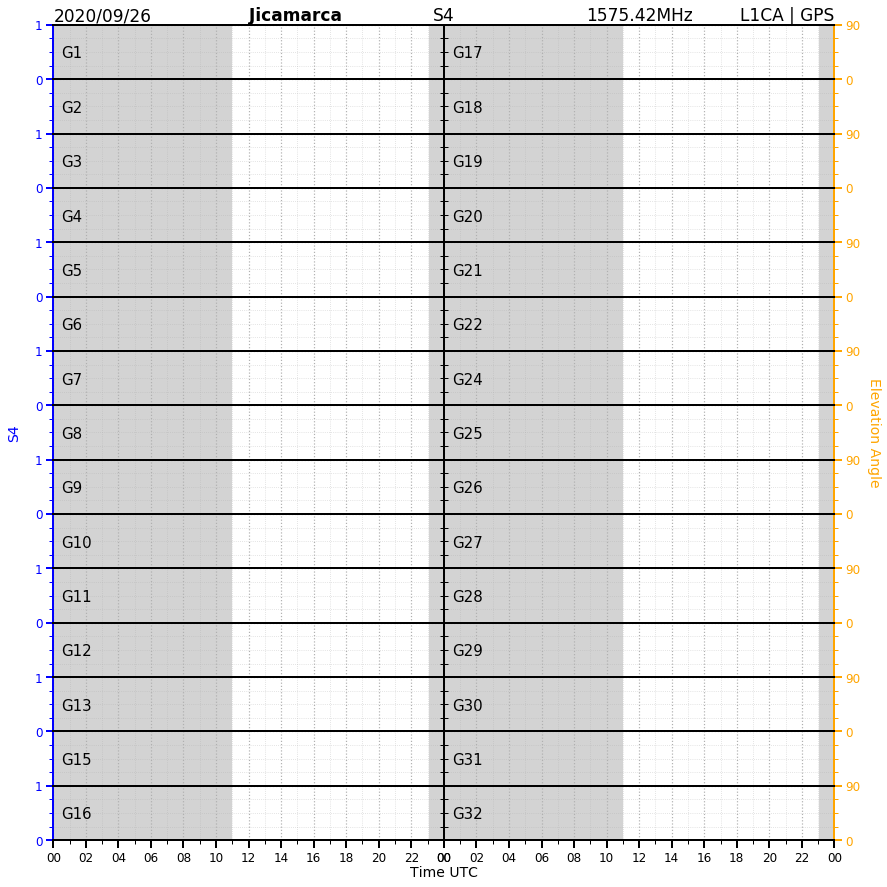

In [91]:
# Test
plot_s4('G', freq_list[0])

'Ok'

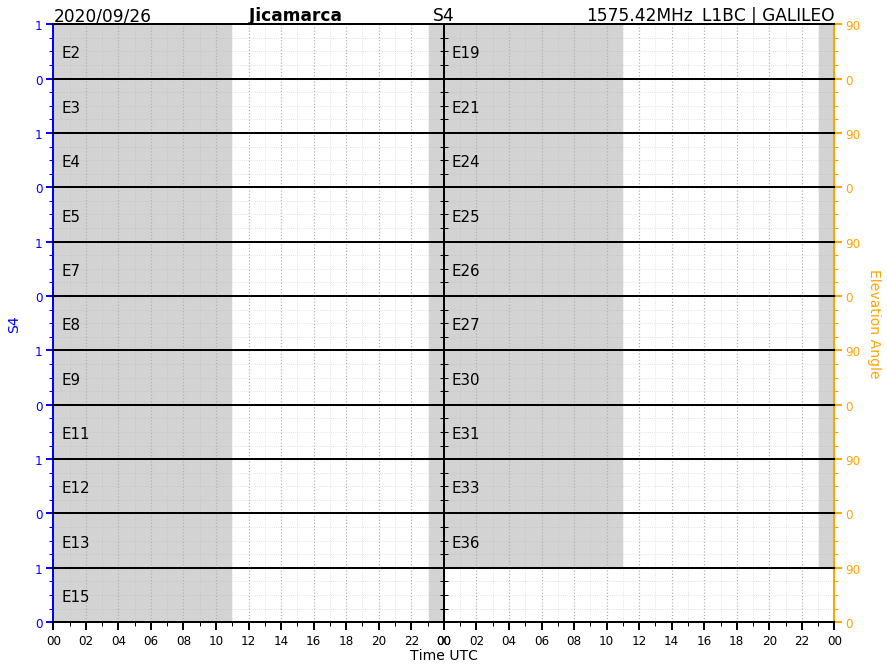

In [82]:
plot_s4('E', freq_list[0])